In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import random
from scipy.special import comb
import scipy as sp

sns.set(style='ticks', color_codes = True)

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 정규분포

In [3]:
df = pd.read_csv(os.path.join('data', 'StudentsPerformance.csv'))
df.shape

(1000, 8)

<AxesSubplot:xlabel='math score', ylabel='Density'>

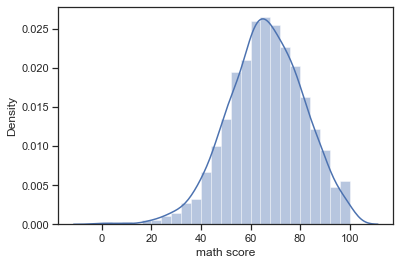

In [4]:
# 수학 점수 분포
sns.distplot(df['math score'])

In [5]:
# 수학 점수 평균 값
df['math score'].mean()

66.089

In [6]:
df[(df['math score'] > 50) & (df['math score'] < 70)]['math score'].count() / 1000

0.441

In [7]:
# 50점까지의 cdf -> 50 이하
# 맨 왼쪽
sp.stats.norm.cdf(50, df['math score'].mean(), df['math score'].std())

0.14433038476274956

In [8]:
# 70점까지의 cdf -> 70 이상
# 맨 오른쪽
sp.stats.norm.cdf(70, df['math score'].mean(), df['math score'].std())

0.6017691971371323

In [9]:
# 수학점수를 정규분포라 가정한다면, 수학 점수의 모데이터에 대한 추론을 할 수 있음
min_v = sp.stats.norm.cdf(50, df['math score'].mean(), df['math score'].std())
max_v = sp.stats.norm.cdf(70, df['math score'].mean(), df['math score'].std())

max_v - min_v, df[(df['math score'] > 50) & (df['math score'] < 70)]['math score'].count() / 1000

(0.4574388123743827, 0.441)

<AxesSubplot:ylabel='Density'>

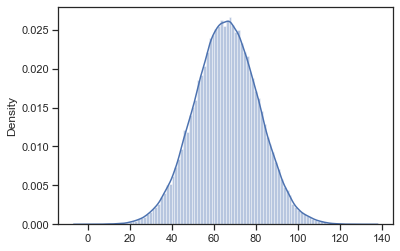

In [10]:
# normal dist > 임의의 값 생성
example = sp.stats.norm.rvs(size=100000, loc=df['math score'].mean(), scale=df['math score'].std())
sns.distplot(example, bins=100)

# result
# 100점 이상이 없어야 하는데 임의값이라 생성됨

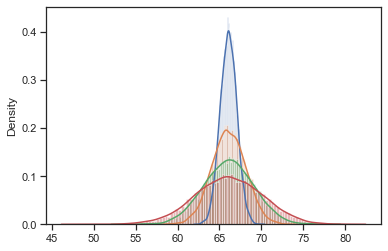

In [12]:
# 표준 편차가 커질 수록 넓게 퍼지고 있음
for std in range(1, 5):
    examples = sp.stats.norm.rvs(size=10000, loc=df['math score'].mean(), scale=std)
    sns.distplot(examples, bins=100)